In [2]:
import numpy as np
import keras
from keras.models import load_model
import csv
from createdatas import gaussian_beam
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit    # フィッティング用
date = str(datetime.date.today())
print(date)
NOISE = 10
print(NOISE)

Using TensorFlow backend.


2020-10-27
10


In [3]:
#　テストデータ取得
file_num = 20 #テストファイル数20
test_num = 101 #データ数(0%~100%)
data_size = 100 #配列の大きさ

t_101 = np.zeros((file_num ,test_num))
x_101 = np.zeros((file_num, test_num, data_size))
n = range(0, file_num)
test_nums = range(0, test_num)

def _testdata(x, t):
    for k in n:
        
        for key in test_nums:
            file_path = "/Users/nagaiyuma/Desktop/100%/" + str(n[k]) + "/x_" + str(test_nums[key]) + ".txt"
            with open(file_path) as f:
                file_str = f.read().splitlines()
                f.close

            for i in range(0, data_size):
                x[k][key][i] = float(file_str[i])

        for key in test_nums:
            file_path = "/Users/nagaiyuma/Desktop/100%/" + str(n[k]) + "/t_" + str(test_nums[key]) + ".txt"
            with open(file_path) as f:
                file_str = f.read()
                f.close

            t[k][key] = float(file_str)

    return x, t


_testdata(x_101, t_101)

print(x_101.shape)
print(t_101.shape)

(20, 101, 100)
(20, 101)


In [ ]:
#過去の訓練データ読込
data_py_path = "/Users/nagaiyuma/Desktop/maindata/201016/noise30%/2020-10-16"
with open(data_py_path + "x_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    x_train = np.array([row for row in reader])
    
with open(data_py_path + "x_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    x_test = np.array([row for row in reader])
    
with open(data_py_path + "t_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_train = np.array([row for row in reader])
    
with open(data_py_path + "t_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_test = np.array([row for row in reader])

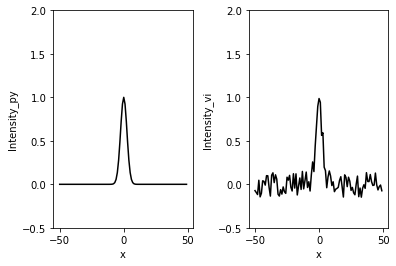

In [4]:
#表示
x_array = np.arange(-50, 50, 1.0)   
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(x_array, x_101[0][0],  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_py')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.plot(x_array, x_101[0][30],  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_vi')
plt.ylim(-0.5, 2.0)
plt.show()
plt.close()

In [12]:
#学習パラメータの取得
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise"+str(NOISE)+"-cnn1.h5"
model = load_model(save_model_path)

In [13]:
ave_101 = np.zeros(test_num)
std_101 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))

for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])
    
print(pred_x.shape)
ave_101 = np.average(error, axis=0)
std_101 = np.std(error, axis=0)

(20, 101)


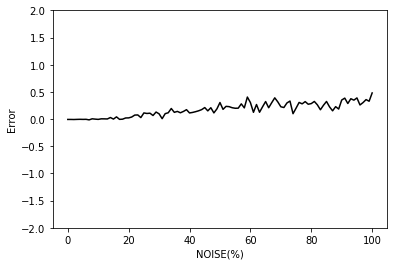

0%:-0.0067098140716552734±0.0
10%:-0.005525261163711548±0.03941218382112642
20%:0.021741962432861327±0.12133013867609421
30%:0.09622105360031127±0.15817076300660823
40%:0.11265754997730255±0.21289488402757778
50%:0.30450124740600587±0.23001895399283542
60%:0.3039743900299072±0.2336262700373883
70%:0.22640948593616486±0.2535406142767748
80%:0.2850740820169449±0.31031923072477313
90%:0.35056700110435485±0.3326307855876222
100%:0.48075931072235106±0.2442301449283015


In [14]:
#結果の表示
plt.plot(test_nums, ave_101,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_101[i])+ "±" + str(std_101[i])
    print(print_ave)

In [7]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise"+str(NOISE)+"-100%vi.csv"
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = test_nums
save_data[1] = ave_101
save_data[2] = std_101
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

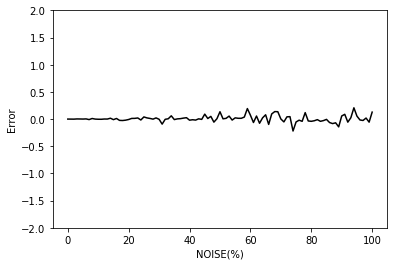

0%:-4.4171386496305376e-17±1.232595164407831e-32
10%:-0.0031183959793418745±0.041642692957500914
20%:-0.007605442301476415±0.10949464992225587
30%:-0.003863586093020775±0.1603683305231365
40%:-0.020396938253416205±0.20769305418094225
50%:0.13513439539370684±0.2786555838442241
60%:0.07125724356527752±0.288070086043761
70%:0.0023841002270732826±0.35210905199254716
80%:-0.04103214386654283±0.3237038088117295
90%:0.05707320512828677±0.39935390335191967
100%:0.12800680776460863±0.44387146396014215


In [8]:
# ガウシアンビームのパラメータ
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
x_array = np.arange(-center, center, 1.0)
fit_param_x = np.zeros((test_num, 4))
error = np.zeros((file_num, test_num))

t_fit = t_101 - 1 #x = 0の補正
for i in range(file_num):
    for k in range(test_num):
        profile_x = x_101[i][k]
        param, cov  = curve_fit(gaussian_beam, x_array, profile_x, p0=param_ini_x, maxfev=2000)
        fit_param_x[n][0] = param[0]
        fit_param_x[n][1] = param[1]
        fit_param_x[n][2] = param[2]
        fit_param_x[n][3] = param[3]
        
        error[i][k] = param[1]-t_fit[i][k]
    
ave_fit = np.average(error, axis=0)
std_fit= np.std(error, axis=0)

#結果の表示
plt.plot(test_nums, ave_fit,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_fit[i])+ "±" + str(std_fit[i])
    print(print_ave)

In [9]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"-100%_fitvi.csv"
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = test_nums
save_data[1] = ave_fit
save_data[2] = std_fit
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

In [20]:
#学習パラメータの取得
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise"+str(NOISE)+"-cnn3.h5"
model = load_model(save_model_path)

In [21]:
ave_101_3 = np.zeros(test_num)
std_101_3 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))

for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).T[1].flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])
    
print(pred_x.shape)
ave_101_3 = np.average(error, axis=0)
std_101_3 = np.std(error, axis=0)

(20, 101)


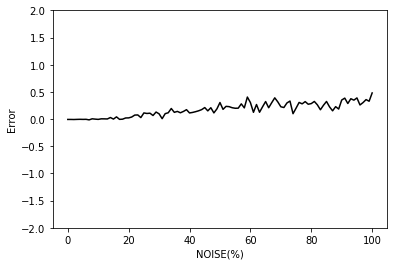

0%:-0.043482422828674316±0.0
10%:-0.0632537841796875±0.0367909757910502
20%:-0.0715029776096344±0.0683642157442758
30%:-0.09932287633419037±0.10418420263084993
40%:-0.08275516033172607±0.15009053503888506
50%:-0.04133184552192688±0.1523506784914504
60%:0.002313518524169922±0.12716737927255914
70%:-0.11422234773635864±0.14800261307791657
80%:-0.07380972206592559±0.14257484504015777
90%:-0.09495384991168976±0.15748882956221666
100%:-0.027765113115310668±0.15995268910538954


In [22]:
#結果の表示
plt.plot(test_nums, ave_101,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_101_3[i])+ "±" + str(std_101_3[i])
    print(print_ave)

In [8]:
#学習パラメータの取得
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201027/noise"+str(NOISE)+"-cnn3.h5"
model = load_model(save_model_path)

In [9]:
ave_101_3 = np.zeros(test_num)
std_101_3 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))

for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).T[1].flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])
    
print(pred_x.shape)
ave_101_3 = np.average(error, axis=0)
std_101_3 = np.std(error, axis=0)

(20, 101)


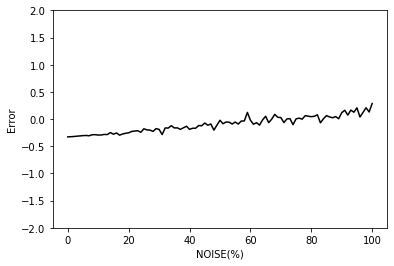

0%:-0.3269631862640381±0.0
10%:-0.29416791796684266±0.04094199265232031
20%:-0.2527174949645996±0.07028712393456876
30%:-0.18971744775772095±0.11934254361302216
40%:-0.18871006965637208±0.18514712702239086
50%:-0.022107231616973876±0.20341277561983223
60%:-0.020634037256240845±0.23459379820755719
70%:0.027853447198867797±0.20931896915686005
80%:0.0446311354637146±0.18531654523786653
90%:0.11691731810569764±0.20519751229271202
100%:0.28619676232337954±0.23968347522412065


In [10]:
#結果の表示
plt.plot(test_nums, ave_101_3,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_101_3[i])+ "±" + str(std_101_3[i])
    print(print_ave)

In [13]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise"+str(NOISE)+"-100%_3vi.csv"
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = test_nums
save_data[1] = ave_101_3
save_data[2] = std_101_3
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

In [14]:
print(x_101[0][30])

[-0.07254942 -0.09410472 -0.11760066  0.04669524 -0.14426786 -0.1028764
  0.04029247  0.03404678 -0.00916733  0.0993194   0.09797482 -0.03539926
 -0.13531297  0.10433618  0.13205051  0.01959645  0.1093308   0.0593795
 -0.11411283 -0.13497032 -0.06129445 -0.11270081 -0.03008241 -0.08582452
 -0.10405242  0.08167798  0.04814116  0.10299708 -0.03289297 -0.07689044
  0.12167175 -0.0435137   0.12055285 -0.12248631 -0.02091593  0.07291571
 -0.05895254  0.14811564 -0.05238234  0.04140552  0.1406641  -0.03658176
  0.02931796 -0.0769783   0.11245971  0.2573165   0.14647459  0.4399841
  0.67079579  0.89616057  0.98623729  0.94267542  0.56291805  0.59214951
  0.19660169  0.15746083 -0.03930159  0.0849718   0.15361222  0.09514373
 -0.01428568  0.02909294 -0.08439171 -0.05599324 -0.04718609 -0.03432575
  0.04430104  0.08745037 -0.026845   -0.14629395  0.10884465  0.08056233
 -0.02676454  0.08168122  0.03634965 -0.07007633 -0.03597026 -0.09831377
 -0.12018555  0.0013013   0.09450721 -0.14220862 -0.04